In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040477.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2        3         4         5         6  \
0  1.228739  1.269795  1.330401  1.41349  1.518084  1.644184  1.787879   

          7         8         9  ...      4192      4193      4194      4195  \
0  1.945259  2.086999  2.218964  ...  1.652004  1.585533  1.524927  1.471163   

      4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.42522  1.387097  1.356794  1.335288     104.50582      56.817656  

[1 rows x 4202 columns]
[104.50582033]  /  [56.81765575]
          0         1         2        3         4         5         6  \
0  1.228739  1.269795  1.330401  1.41349  1.518084  1.644184  1.787879   

          7         8         9  ...      4190     4191      4192      4193  \
0  1.945259  2.086999  2.218964  ...  1.800587  1.72434  1.652004  1.585533   

       4194      4195     4196      4197      4198      4199  
0  1.524927  1.471163  1.42522  1.387097  1.356794  1.335288  

[1 rows x 4200 columns]


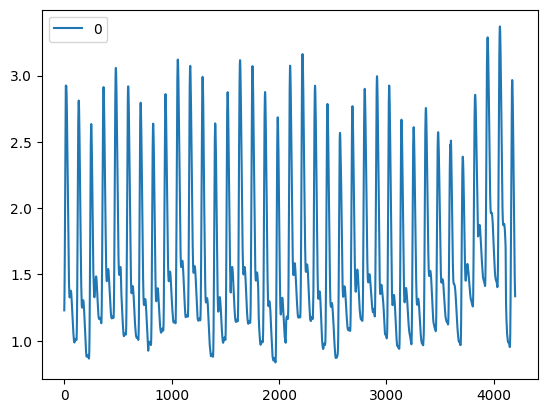

In [434]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [435]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

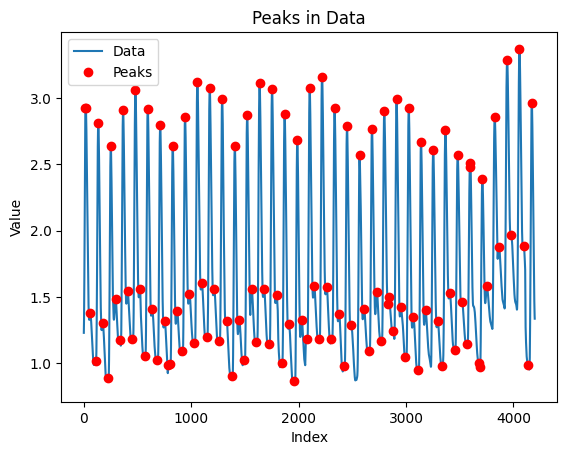

{'indices': array([  15,   18,   60,  109,  135,  176,  222,  251,  296,  335,  366,
        409,  451,  480,  522,  566,  595,  637,  683,  711,  753,  787,
        798,  828,  869,  914,  943,  984, 1027, 1057, 1099, 1144, 1173,
       1214, 1259, 1288, 1329, 1376, 1406, 1447, 1494, 1521, 1563, 1608,
       1637, 1679, 1724, 1753, 1795, 1843, 1870, 1910, 1958, 1988, 2030,
       2074, 2103, 2146, 2192, 2219, 2261, 2306, 2335, 2377, 2422, 2451,
       2492, 2568, 2609, 2655, 2683, 2729, 2768, 2798, 2830, 2841, 2883,
       2912, 2953, 2991, 3026, 3069, 3115, 3140, 3182, 3254, 3296, 3339,
       3368, 3408, 3452, 3481, 3521, 3564, 3596, 3600, 3676, 3689, 3711,
       3753, 3826, 3867, 3942, 3979, 4057, 4095, 4139, 4171]), 'values': array([2.92473118, 2.92277615, 1.3773216 , 1.01466276, 2.8113392 ,
       1.30498534, 0.8914956 , 2.6344086 , 1.48484848, 1.17302053,
       2.91300098, 1.54056696, 1.18181818, 3.05767351, 1.55620723,
       1.05474096, 2.91886608, 1.4115347 , 1.02248289, 2.

In [436]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [439]:
def filter_peak_values(peak_values_df, threshold=1.3):
    """
    Filter peak_values_df to remove values below the specified threshold.

    Parameters:
    - peak_values_df: DataFrame containing peak values
    - threshold: float, minimum value required to keep a value (default: 1.5)

    Returns:
    - filtered_peak_values_df: DataFrame with values below threshold removed
    """
    filtered_df = peak_values_df[peak_values_df['Value'] >= threshold]
    return filtered_df


# Example usage
filtered_df = filter_peak_values(peak_values_df)
print(filtered_df)


     Index     Value
0       15  2.924731
1       18  2.922776
2       60  1.377322
4      135  2.811339
5      176  1.304985
..     ...       ...
102   3942  3.288368
103   3979  1.966764
104   4057  3.370479
105   4095  1.881720
107   4171  2.965787

[73 rows x 2 columns]


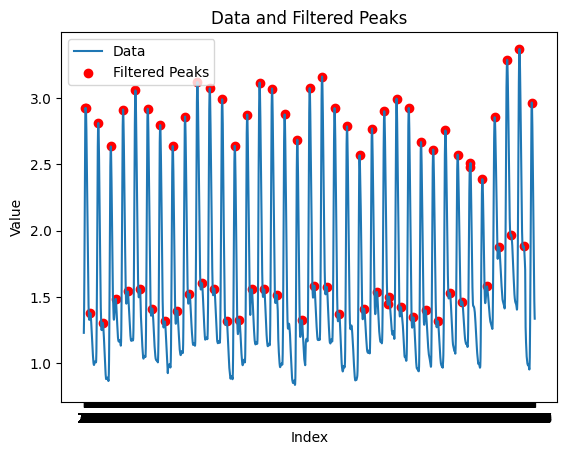

In [440]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()

In [441]:
def split_values_high_low(filtered_df, threshold=2):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[2.924731182795699, 2.9227761485826003, None, None, 2.811339198435973, None, None, 2.634408602150537, None, None, 2.913000977517106, None, None, 3.0576735092864125, None, None, 2.918866080156403, None, None, 2.795698924731183, None, None, None, 2.6373411534701856, None, None, 2.860215053763441, None, None, 3.121212121212121, None, None, 3.0733137829912023, None, None, 2.9902248289345064, None, None, 2.6392961876832843, None, None, 2.874877810361681, None, None, 3.1163245356793743, None, None, 3.071358748778104, None, None, 2.875855327468231, None, None, 2.6852394916911044, None, None, 3.074291300097752, None, None, 3.1622678396871944, None, None, 2.9237536656891496, None, None, 2.7859237536656893, None, 2.567937438905181, None, None, 2.76930596285435, None, None, 2.900293255131965, None, None, None, 2.995112414467253, None, None, 2.924731182795699, None, None, 2.667644183773216, None, 2.610948191593353, None, None, 2.755620723362659, None, None, 2.572825024437928, None, None, 2.4789833

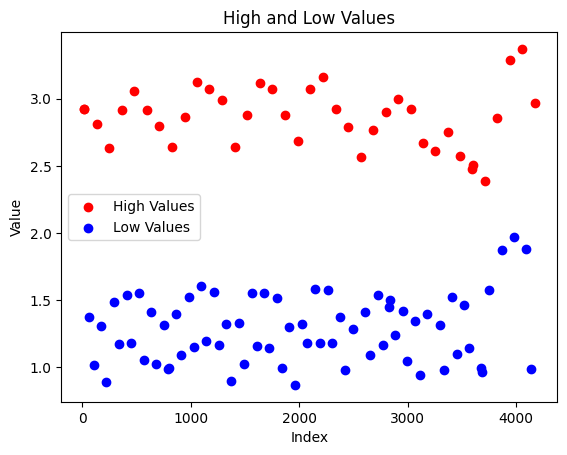

In [442]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [443]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.8587362458330206
Average Low Value: 1.2850949891623102


In [444]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=4, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [445]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.8587362458330206 : 0.7146840614582551
Scaled value of 1.2850949891623102 : 0.32127374729057756
